In [ ]:
# install package requirements for program
!pip install transformers
!pip install datasets
!pip install numpy
!pip install pandas
!pip install tensorflow-gpu
!pip install sklearn

     |████████████████████████████████| 2.1MB 22.3MB/s 
     |████████████████████████████████| 3.3MB 31.6MB/s 
     |████████████████████████████████| 901kB 44.6MB/s 
     |████████████████████████████████| 225kB 19.5MB/s 
     |████████████████████████████████| 245kB 33.3MB/s 
     |████████████████████████████████| 112kB 44.1MB/s 
     |████████████████████████████████| 394.3MB 39kB/s 


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [ ]:
# import the training set and task B test set from the git repository
training_url = 'https://gitlab.com/ed17t2m/third-year-project/-/raw/master/data%20sets/stopword%20test%20sets/stopwords-olid-training-set.csv'
test_url = 'https://gitlab.com/ed17t2m/third-year-project/-/raw/master/data%20sets/stopword%20test%20sets/stopwords-fulltestset-c.csv'


original_training_url = 'https://gitlab.com/ed17t2m/third-year-project/-/raw/master/data%20sets/original%20test%20sets/olid-training-set.csv'
original_test_url = 'https://gitlab.com/ed17t2m/third-year-project/-/raw/master/data%20sets/original%20test%20sets/fulltestset-b.csv'
# make a request for the raw data
training_req = requests.get(training_url).content
test_req = requests.get(test_url).content
original_training_req = requests.get(original_training_url).content
original_test_req = requests.get(original_test_url).content


#convert the raw data into a pandas Dataframe for additional data prep
training_df = pd.read_csv(io.StringIO(training_req.decode('utf-8')))
test_df = pd.read_csv(io.StringIO(test_req.decode('utf-8')))
original_training_df = pd.read_csv(io.StringIO(original_training_req.decode('utf-8')))
original_test_df = pd.read_csv(io.StringIO(original_test_req.decode('utf-8')))

# perform removal of all NULL value rows for task C
# prevents BERT learning tweets which will not be useful and speeds up training
original_training_df = original_training_df[original_training_df['subtask_c'].notna()]
training_df = training_df[training_df['subtask_c'].notna()]

In [ ]:
# initialise the tokenizer for bert uncased
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# convert the pd.dataframes to datasets
training_dataset = Dataset.from_pandas(training_df)
test_dataset = Dataset.from_pandas(test_df)
original_training_dataset = Dataset.from_pandas(original_training_df)
original_test_dataset = Dataset.from_pandas(original_test_df)


In [ ]:
tweets = training_dataset['tweet']
tweets += test_dataset['tweet']

original_tweets = original_training_dataset['tweet']
original_tweets += original_test_dataset['tweet']

print(len(tweets))
print(len(tweets))

4089
4089


In [ ]:
encodings = tokenizer(tweets)
original_encodings = tokenizer(original_tweets)

148


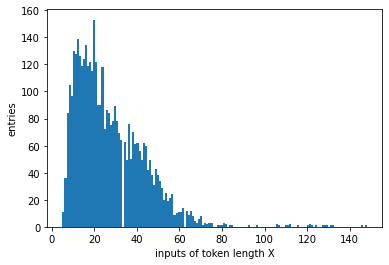

In [ ]:
Xids = encodings['input_ids']
Xmask = encodings['attention_mask']

sizes = []
for i in range (len(Xids)):
  sizes.append(len(Xids[i]))

id = np.argmax(sizes)
bins = sizes[id]

plt.hist(sizes, bins=bins)
plt.ylabel('entries')
plt.xlabel('inputs of token length X')

print(str(bins))

171


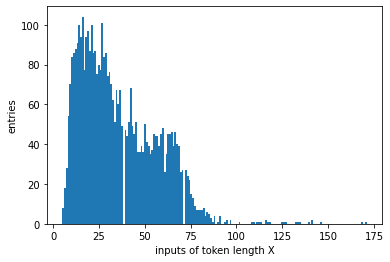

In [ ]:
original_Xids = original_encodings['input_ids']
original_Xmask = original_encodings['attention_mask']

sizes = []
for i in range (len(original_Xids)):
  sizes.append(len(original_Xids[i]))

id = np.argmax(sizes)
bins = sizes[id]

plt.hist(sizes, bins=bins)
plt.ylabel('entries')
plt.xlabel('inputs of token length X')

print(str(bins))

In [ ]:
ids = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
steps = [100,100,900,300,100,700,900,500,400,400,500,700,900,100,100,500,700,100,100]
LR = [3,3,5,5,5,1,3,1,1,3,3,5,1,1,1,5,3,3,3]

met = []
for i in range(19):
  val = (steps[i] * LR[i])/(steps[i] + LR[i])
  met.append(val)

bins = 20
bar = plt.bar(ids, met)
plt.ylabel('warm-up steps')
plt.xlabel('model ranking')
plt.xticks(ids)



([<matplotlib.axis.XTick at 0x7fa50862bb90>,
 <a list of 19 Text major ticklabel objects>)

Text(0.5, 1.0, 'Task A: Top 5 DistilBERT models using each dataset')

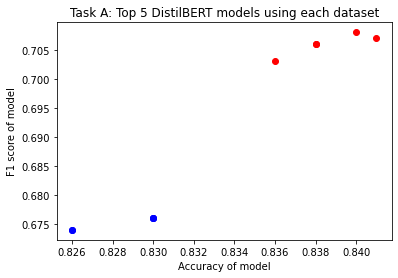

In [ ]:
acc_stop = [0.840, 0.841, 0.838, 0.838, 0.836]
fscore_stop = [0.708, 0.707, 0.706, 0.706, 0.703]

acc_original = [0.830, 0.830, 0.830, 0.826, 0.826]
fscore_original = [0.676, 0.676, 0.676, 0.674, 0.674]

plt.scatter(acc_stop, fscore_stop, color="red")
plt.scatter(acc_original, fscore_original, color="blue")
plt.xlabel('Accuracy of model')
plt.ylabel('F1 score of model')
plt.title('Task A: Top 5 DistilBERT models using each dataset')

#task A

Text(0.5, 1.0, 'Task B: Top 5 DistilBERT models using each dataset')

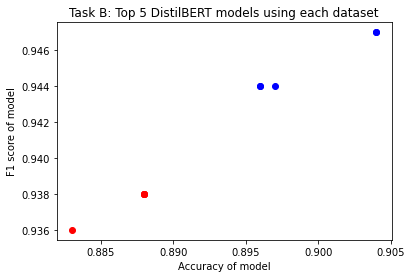

In [ ]:
# Task B
acc_stop = [0.888, 0.888, 0.888, 0.888, 0.883]
fscore_stop = [0.938, 0.938, 0.938, 0.938, 0.936]

acc_original = [0.904, 0.904, 0.897, 0.896, 0.896]
fscore_original = [0.947, 0.947, 0.944, 0.944, 0.944] 

plt.scatter(acc_stop, fscore_stop, color="red")
plt.scatter(acc_original, fscore_original, color="blue")
plt.xlabel('Accuracy of model')
plt.ylabel('F1 score of model')
plt.title('Task B: Top 5 DistilBERT models using each dataset')

In [ ]:
# Task C
acc_stop = [0.685, 0.681, 0.681, 0.676, 0.671]
fscore_stop = [0.494, 0.493, 0.492, 0.489, 0.487]

acc_original = [0.685, 0.681, 0.681, 0.681, 0.66]
fscore_original = [0.495, 0.491, 0.491, 0.491, 0.47] 

plt.scatter(acc_stop, fscore_stop, color="red")
plt.scatter(acc_original, fscore_original, color="blue")
plt.xlabel('Accuracy of model')
plt.ylabel('F1 score of model')
plt.title('Task C: Top 5 DistilBERT models using each dataset')

Text(0.5, 1.0, 'Task C: Top 5 DistilBERT models using each dataset')

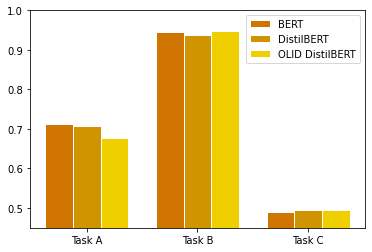

In [ ]:
barWidth = 0.25
BERT = [0.712, 0.945, 0.49]
DistilBERT_stop = [0.708, 0.938, 0.494]
DistilBERT_original = [0.676, 0.947, 0.495]


labels = ['BERT', 'DistilBERT', 'OLID DistilBERT']

r1 = np.arange(len(BERT))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, BERT, color='#cf7500', width=barWidth, edgecolor='white', label=labels[0])
plt.bar(r2, DistilBERT_stop, color='#cf9400', width=barWidth, edgecolor='white', label=labels[1])
plt.bar(r3, DistilBERT_original, color='#f0cf00', width=barWidth, edgecolor='white', label=labels[2])

plt.xticks([r + barWidth for r in range(len(BERT))], ['Task A', 'Task B', 'Task C'])

plt.ylim(ymin=0.45,ymax=1)

plt.legend()